In [10]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # Load a pre-trained YOLO model
import cv2
# from backend.ai.car_detection import CarDetection
video_path = 'C:/Users/amki003/OneDrive - Hennepin County/Documents/Github/CameraVision/backend/media/503.mp4'
model = YOLO('yolov8n.pt')  # Load a pre-trained YOLO model
video_capture = cv2.VideoCapture(video_path)
fps = video_capture.get(cv2.CAP_PROP_FPS)
frame_number = 130 *fps 
image_from_video = video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
success, frame = video_capture.read()
if not success:
    raise Exception("Could not read frame from video")
    
result = model.predict(frame)


0: 384x640 3 cars, 3 traffic lights, 80.4ms
Speed: 3.1ms preprocess, 80.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


In [18]:
boxes = result[0].boxes.data
classes = result[0].boxes.cls

In [30]:
ooi = ["car", "motorcycle", "bus", "truck"]
ids = [int(key) for key, value  in result[0].names.items() if value in ooi]

In [41]:
for index, box in enumerate(result[0].boxes.xyxy):
    print(index, box, classes[index])

0 tensor([1119.8533,  616.6497, 1161.0396,  717.5420]) tensor(9.)
1 tensor([1081.5831,  188.6537, 1157.5087,  238.2034]) tensor(2.)
2 tensor([595.5149, 393.2700, 703.9785, 498.0474]) tensor(2.)
3 tensor([1120.1842,   63.2618, 1149.9677,  127.4643]) tensor(9.)
4 tensor([1048.0994,  380.9526, 1106.8279,  409.1573]) tensor(2.)
5 tensor([281.3820, 176.3354, 307.5404, 225.6300]) tensor(9.)


# Dan

In [92]:
from datetime import datetime
record_id = 62
title = "Southbound Right Turn"
portal = "sb_right"
media_location = "backend/media"
start_time = "15:30"
start_datetime = datetime.strptime(f"2025-09-16 {start_time}:00", "%Y-%m-%d %H:%M:%S")
end_time = "16:30"
end_datetime = datetime.strptime(f"2025-09-16 {end_time}:00", "%Y-%m-%d %H:%M:%S")
number_of_zones = 1

In [93]:
file_path = media_location + f"/{record_id}_0.1_v2.csv"

In [94]:
import pandas as pd
df = pd.read_csv(file_path)
df

,track_id,x1,y1,x2,y2,cls_id,confidence,time,in_area,line_index,zone_index
0,11974,0.931641,0.474513,0.998430,0.601920,2,0.672952,0.000000,False,-1,-1
1,11975,0.768473,0.136700,0.813318,0.298677,2,0.302917,0.066667,False,-1,-1
2,11976,0.534690,0.176208,0.577718,0.228507,2,0.427474,0.066667,False,-1,-1
3,11977,0.201343,0.507583,0.362072,0.740455,2,0.642875,0.066667,False,-1,-1
4,11978,0.592685,0.096715,0.624033,0.140174,2,0.511205,0.066667,False,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
427169,17661,0.455881,0.258595,0.519949,0.352058,2,0.282633,3600.800000,False,-1,-1
427170,17649,0.383718,0.311041,0.474948,0.452026,2,0.650692,3600.833333,False,-1,-1
427171,17652,0.453839,0.258924,0.520424,0.355944,2,0.441458,3600.833333,False,-1,-1
427172,17657,0.507601,0.366283,0.564578,0.467417,2,0.618971,3600.833333,False,-1,-1


In [95]:
track_ids = df[(df["cls_id"] == 5) & (df["in_area"] == True)].track_id.unique()
track_ids

array([12660, 12961, 13560, 13564, 13566, 13567, 13569, 13589, 13597,
       13601, 13761, 14785, 14794, 15079, 15093, 15443, 15699, 15963,
       15965, 16292, 16421, 16638], dtype=int64)

In [96]:
df = df.sort_values(by=["time", "track_id"])

# Create time bins (every 100 timestamps)
bin_size = 100
df['time_bin'] = (df['time'] // bin_size) * bin_size

# Group by time bins instead of individual timestamps
binned_groups = df.groupby('time_bin')
time = []
number = []

for name, group in binned_groups:
    # get number of buses that are in the area
    buses_in_area = group[(group["cls_id"] == 5) & (group["in_area"] == True)].track_id.nunique()
    # Convert the timestamp to actual datetime by adding seconds to start_datetime
    actual_time = start_datetime + pd.Timedelta(seconds=name)
    time.append(actual_time)
    number.append(buses_in_area)

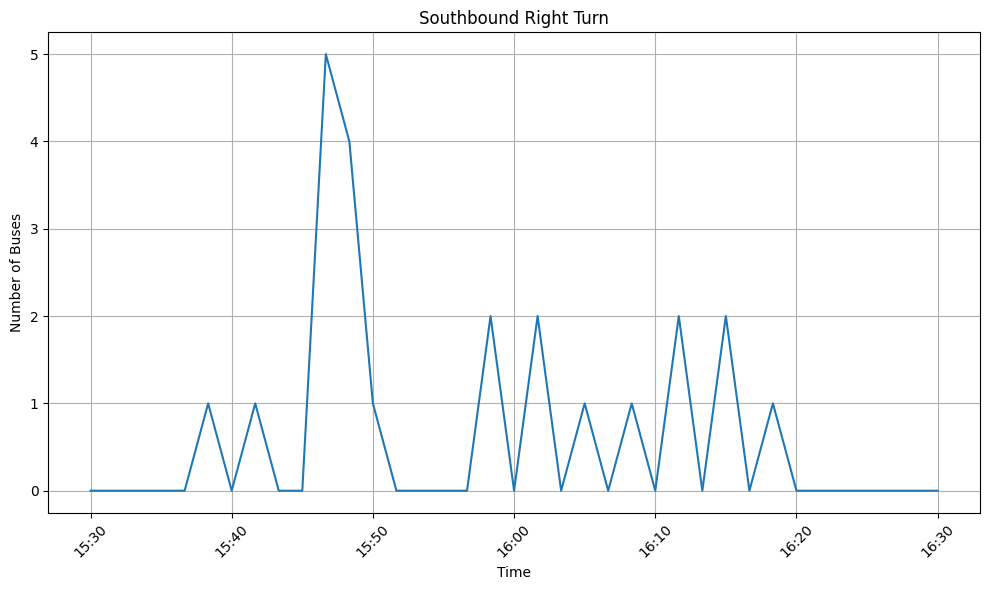

In [97]:
from matplotlib.dates import DateFormatter

import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(time, number)

# Format x-axis to show only Hour:Minute
date_format = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

# Add labels and title
plt.grid()
plt.xlabel('Time')
plt.ylabel('Number of Buses')
plt.title(title)

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()